In [256]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import math

In [41]:
py = plotly.tools.set_credentials_file(username='nada.diaelsaid', api_key='QYEGuN2lc7aZncdyBPSr')

In [240]:
my_data = pd.read_csv('/home/nada/machine-learning/data_science_dataset_wuzzuf.csv', delimiter = ',').dropna()
my_data
my_data.info()

#consrtuct series of the count of each job category number
c1 = my_data['job_category_1'].value_counts()
c2 = my_data["job_category_2"].value_counts()
c3 = my_data["job_category_3"].value_counts()

# Drop Select from job_category2&3
c2.drop("Select", axis = 0, errors = 'raise', inplace = True)
c3.drop("Select", axis = 0, errors = 'raise', inplace = True)

# Arrange the 3 serieses by ascending order of the job cetgory name
c1.sort_index(axis = 0,  ascending=True, inplace=True)
c2.sort_index(axis = 0,  ascending=True, inplace=True)
c3.sort_index(axis = 0,  ascending=True, inplace=True)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 19114 entries, 28 to 21849
Data columns (total 18 columns):
id                     19114 non-null object
city_name              19114 non-null object
displayed_job_title    19114 non-null object
job_category_1         19114 non-null object
job_category_2         19114 non-null object
job_category_3         19114 non-null object
job_industry_1         19114 non-null object
job_industry_2         19114 non-null object
job_industry_3         19114 non-null object
salary_min             19114 non-null int64
salary_max             19114 non-null int64
num_vacancies          19114 non-null int64
career_level           19114 non-null object
experience_years       19114 non-null object
post_date              19114 non-null object
views                  19114 non-null int64
description            19114 non-null object
job_requirements       19114 non-null object
dtypes: int64(4), object(14)
memory usage: 2.8+ MB


In [172]:
jobs = my_data.job_category_1.unique()
jobs = np.sort(jobs, axis=-1, kind='quicksort')
print jobs


['Accounting/Finance/Insurance' 'Administration' 'Banking'
 'Biotech/R&D/Science' 'Building Construction/Skilled Trades' 'Business '
 'Creative/Design' 'Customer Service/Support' 'Editorial/Writing'
 'Education/Training' 'Engineering' 'Fashion' 'Food Services/Hospitality'
 'Human Resources' 'IT/Software Development'
 'Installation/Maintenance/Repair' 'Legal' 'Logistics/Transportation'
 'Management' 'Manufacturing/Production/Operations' 'Marketing'
 'Media/Journalism/Publishing' 'Medical' 'Pharmaceutical'
 'Project/Program Management' 'Quality Assurance/Quality Control'
 'Research' 'Sales/Retail/Business Development' 'Sports and Leisure'
 'Tourism/Travel']


In [225]:
#This stacked bar chart shows how jobs category are found in each stage (jobs_catgeory 1 & 2 & 3)
# As we will see that IT/Software development is the highest in job catgeoory1
trace1 = go.Bar(
    x=jobs,
    y=c1,
    name='job_category_1'
)
trace2 = go.Bar(
    x=jobs,
    y=c2,
    name='job_category_2'
)
trace3 = go.Bar(
    x=jobs,
    y=c3,
    name='job_category_3'
)
data = [trace1, trace2, trace3]
layout = go.Layout(barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


# Now we want to see the correlation between career level, experience years, salary and views

['Experienced (Non-Manager)' 'Entry Level' 'Manager'
 'Senior Management (e.g. VP, CEO)' 'Student']
[1 1 1 ..., 2 1 1]
<type 'numpy.ndarray'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facb5451710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7facb4e04790>]], dtype=object)

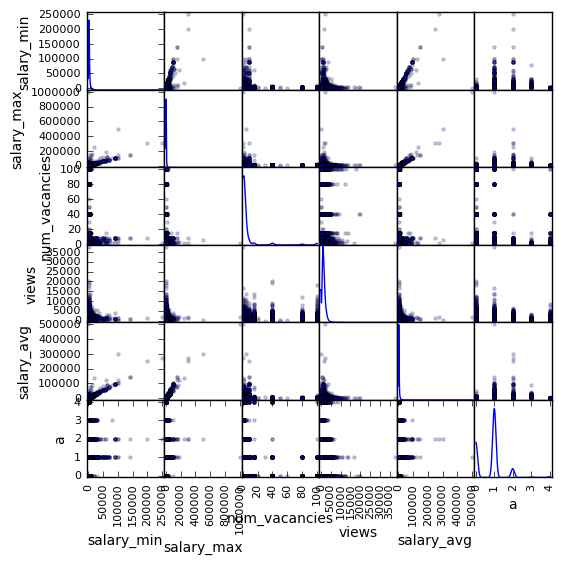

In [252]:
print my_data["career_level"].unique()
# Convert categorical data of career level to numeric, using Skilearn
le = preprocessing.LabelEncoder()
le.fit(my_data['career_level'])
a = le.transform(my_data['career_level'])
print a
my_data["a"] = a
print type(my_data["experience_years"].values)
scatter_matrix(my_data, alpha=0.2, figsize=(6, 6), diagonal='kde')



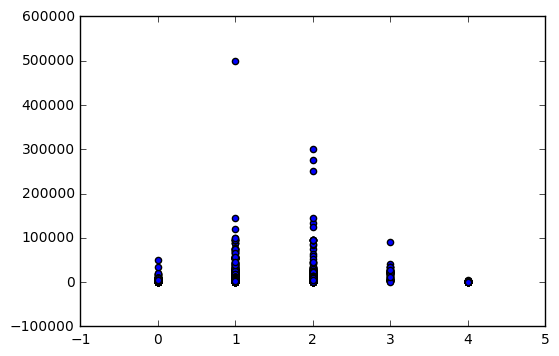

In [253]:
# Get average salary between max and min, then plot salary_avg and career level
my_data['salary_avg'] = my_data[['salary_min', 'salary_max']].mean(axis=1)
my_data
plt.scatter(a, my_data["salary_avg"].values)
plt.show()

In [281]:
gnb = GaussianNB()
total = len(my_data.index)
numpy_data = my_data[["a","salary_min", "salary_max", "views", "num_vacancies"]].as_matrix
# len(numpy_data.shape)
x_train, x_test, y_train, y_test = train_test_split(numpy_data, my_data[["job_category_1"]].as_matrix, test_size=0.33, random_state=42)

TypeError: 'instancemethod' object has no attribute '__getitem__'